In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import time
%matplotlib inline

# Insert mavenn at beginning of path
import sys
path_to_mavenn_local = '../../../../'
sys.path.insert(0, path_to_mavenn_local)

#Load mavenn and check path
import mavenn
print(mavenn.__path__)

# MAVE-NN utilities
from mavenn.src.dev import mutations_to_dataset

['../../../../mavenn']


In [2]:
# Protein sequence determined from the wt coding DNA sequence in Snapgene
# 'AATATTACAAACTTGTGCCCTTTTGGTGAAGTTTTTAACGCCACCAGATTTGCATCTGTTTATGCTTGGAACAGGAAGAGAATCAGCAACTGTGTTGCTGATTATTCTGTCCTATATAATTCCGCATCATTTTCCACTTTTAAGTGTTATGGAGTGTCTCCTACTAAATTAAATGATCTCTGCTTTACTAATGTCTATGCAGATTCATTTGTAATTAGAGGTGATGAAGTCAGACAAATCGCTCCAGGGCAAACTGGAAAGATTGCTGATTATAATTATAAATTACCAGATGATTTTACAGGCTGCGTTATAGCTTGGAATTCTAACAATCTTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAGCACACCTTGTAATGGTGTTGAAGGTTTTAATTGTTACTTTCCTTTACAATCATATGGTTTCCAACCCACTAATGGTGTTGGTTACCAACCATACAGAGTAGTAGTACTTTCTTTTGAACTTCTACATGCACCAGCAACTGTTTGTGGACCTAAAAAGTCTACT'
wt_seq = 'NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST'
len(wt_seq)

201

In [3]:
# Save data_df
file_name = '../ace2rbd_data.csv.gz'
data_df = pd.read_csv(file_name, compression='gzip')

In [4]:
# Split into training and test sets
ix = data_df['training_set']
training_df = data_df[ix].copy()
test_df = data_df[~ix].copy()

In [5]:
# # Subsample training data
# ix = np.random.rand(len(training_df)) < .1
# training_df = training_df[ix]

In [6]:
# Note: Inference success is rather sensitive to the hyperparameters
# Sees were not controlled. 
# Adamax: fails after Epoch 111, with loss: 48.7795
# Nadam: fails after Epoch 67, loss: 15.5053
# Nadam w/ clipvalue=1: fails after Epoch 65, loss: 68.9994
# Adam: fails after Epoch 50, loss: 25.4127
# Adam: fails after Epoch 19, loss: 
# Adam w/ amsgrad: fails after Epoch 61, loss: 22.1944
# RMSprop: fails after Epoch 10, loss: 107.0776
# Adadelta: stopped after Epoch 54, loss: 68.0163
# Adagrad: stopped after Epoch 69, loss: 120.6726

In [7]:
# additive, Cauchy, ge_heteroskedasticity_order=2
# seed=0, learning_rate=0.0005, batch_size=50, early_stopping=True, early_stopping_patience=20
# Adam: run 1: Epoch 58, loss: 21.8426 (Cauchy, order 2)
#       run 2: Epoch 58, loss: 21.8426 (Cauchy, order 2)
#       run 3: Epoch 58, loss: 21.8426 (Cauchy, order 2, saved!) -> saved as v2
# Adam (other runs)
#       run 1: Epoch 109, loss: 18.3330 (SkewedT, order 2)
#       run 2: Epoch 47, loss: 43.6063 (SkewedT, order 2)
#       run 3: Epoch 47, loss: 43.6024 (SkewedT, order 2)
#       run 4: Epoch 89, loss: 33.3454 (SkewedT, order 3)
#       run 5: Epoch 94, loss: 31.2415 (SkewedT, order 3)
#       run 6: Epoch 47, loss: 37.9068 (Cauchy, order 2, epsilon 1E-5)
#       run 7: Epoch 39, loss: 53.5997 (Cauchy, order 2, epsilon 1E-3)
#       run 8: Epoch 33, loss: 58.4964 (Cauchy, order 2, epsilon 1E-10)

# Set seed
mavenn.set_seed(0)

# Set model
model = mavenn.Model(x=training_df['x'].values, 
                     y=training_df['y'].values,
                     theta_regularization=.1,
                     eta_regularization=.1,
                     alphabet='protein',
                     gpmap_type='additive',
                     regression_type='GE',
                     ge_noise_model_type='Cauchy',
                     ge_heteroskedasticity_order=2)

# Do inference
start_time = time.time()
history = model.fit(optimizer='Adam',
                    epochs=58, 
                    early_stopping=True, 
                    early_stopping_patience=20, 
                    learning_rate=.0005, 
                    batch_size=50)
training_time = time.time()-start_time
print(f'training time: {training_time:.1f} seconds')

Epoch 1/58
1874/1874 [==============================] - 4s 2ms/step - loss: 128.1770 - val_loss: 140.9179
Epoch 2/58
1874/1874 [==============================] - 4s 2ms/step - loss: 121.1816 - val_loss: 135.2970
Epoch 3/58
1874/1874 [==============================] - 3s 2ms/step - loss: 120.7476 - val_loss: 134.0144
Epoch 4/58
1874/1874 [==============================] - 3s 2ms/step - loss: 120.6838 - val_loss: 133.5695
Epoch 5/58
1874/1874 [==============================] - 3s 2ms/step - loss: 120.6586 - val_loss: 133.8427
Epoch 6/58
1874/1874 [==============================] - 3s 2ms/step - loss: 120.6587 - val_loss: 133.2099
Epoch 7/58
1874/1874 [==============================] - 3s 2ms/step - loss: 120.6528 - val_loss: 133.5751
Epoch 8/58
1874/1874 [==============================] - 3s 2ms/step - loss: 120.6550 - val_loss: 133.4921
Epoch 9/58
1874/1874 [==============================] - 3s 2ms/step - loss: 120.6516 - val_loss: 132.2866
Epoch 10/58
1874/1874 [=======================

In [8]:
# ## Diagnostics
# nn = model.get_nn()
# nn.trainable_weights

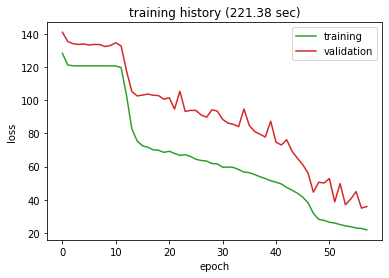

In [9]:
# Extract training loss and validation loss
history_dict = history.history
loss_training = history_dict['loss']
loss_validation = history_dict['val_loss']

# Plot model training history
fig, ax = plt.subplots()
ax.plot(loss_training, color='C2', label='training')
ax.plot(loss_validation, color='C3', label='validation')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.set_title(f"training history ({training_time:.2f} sec)")
ax.legend()

Text(0.5, 1.0, 'mutation effects')

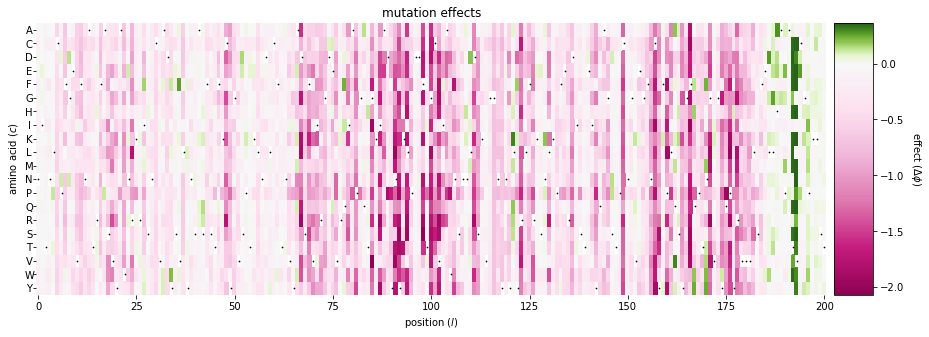

In [14]:
# Set wild-type sequence
wt_seq = 'NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST'

# Get effects of all single-point mutations on phi
dphi_df = mavenn.get_1pt_effects(func=model.x_to_phi,
                                 wt_seq=wt_seq,
                                 alphabet='protein')
# Draw heatmap
fig, ax = plt.subplots(figsize=[15,5])
ax, cb = mavenn.heatmap(dphi_df,
                        ccenter=0,
                        clim_quantile=1,
                        #clim=[-1,.2],
                        c_col='c_mut',
                        l_col='l',
                        value_col='dphi',
                        seq=wt_seq,
                        cmap='PiYG',
                        ax=ax)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
cb.set_label('effect ($\Delta\phi$)', rotation=-90, va="bottom")
ax.set_title('mutation effects')

In [30]:
# Extract data into np.arrays
x = test_df['x'].values
y = test_df['y'].values

# Compute phi and yhat values
phi = model.x_to_phi(x)
yhat = model.phi_to_yhat(phi)

# Create grid for plotting yhat and yqs
phi_lim = [-5, 2.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)
yhat_grid = model.phi_to_yhat(phi_grid)
yqs_grid = model.yhat_to_yq(yhat_grid, q=[.16,.84])

Text(0, 0.5, 'measurement ($y$)')

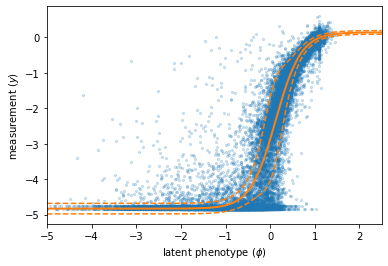

In [31]:
fig, ax = plt.subplots()

ax.scatter(phi, y, color='C0', s=5, alpha=.2, label='test data')
ax.plot(phi_grid, yhat_grid, linewidth=2, color='C1',
        label='$\hat{y} = g(\phi)$')
ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1',
        label='68% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')

Text(0, 0.5, 'measurement ($y$)')

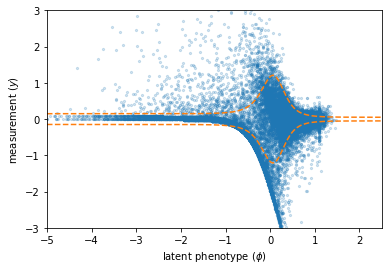

In [34]:
fig, ax = plt.subplots()

ax.scatter(phi, y-yhat, color='C0', s=5, alpha=.2, label='test data')
ax.plot(phi_grid, yqs_grid[:, 0] - yhat_grid, linestyle='--', color='C1',
        label='68% CI')
ax.plot(phi_grid, yqs_grid[:, 1] - yhat_grid, linestyle='--', color='C1')
ax.set_xlim(phi_lim)
ax.set_ylim([-3,3])
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')

In [17]:
# Save model
model.save('ace2rbd_model_v2')
!ls

ace2rbd.csv.gz                     ace2rbd_rbd.csv.gz
ace2rbd.dna                        analyze_ace2rbd.ipynb
ace2rbd_data.csv.gz                analyze_ace2rbd_v2.ipynb
ace2rbd_model.csv                  make_ace2rbd_dataset.ipynb
ace2rbd_model.h5                   tmp.txt
ace2rbd_model_v2.csv               urn_mavedb_00000044-a-2_scores.csv
ace2rbd_model_v2.h5
